<h3> <b>Process 5: Data Modeling & Evaluating</b> </h3>

<hr/>

<h4> <b>Install & Import</b> </h4>

Install & Import the necessary libraries.

In [78]:
# Install libraries
!pip install category_encoders


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import category_encoders as ce
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

<hr/>
<h4> <b>Read data & Create dataframe</b> </h4>

In [80]:
df = pd.read_csv('data/new_data.csv')
df.head()

,jobId,jobTitle,companyName,isAnonymous,isSalaryVisible,jobDescription,jobRequirement,jobLevelId,salary,salaryMax,...,address,industries,jobLevel,jobLevelVI,companySize,languageSelected,prettySalary,durationDays,numOfApplications,typeWorkingName
0,1680760,Nhân Viên Kinh Doanh MT - GT,Công Ty Cổ Phần S77 Hà Nội,False,True,1. Doanh số bán hàng\r\n- Thực hiện bán hàng t...,- Ít nhất 1 năm kinh nghiệm ở vị trí tương đươ...,5,700,700,...,Hà Nội,"{11: 'Customer Service', 32: 'Retail/Wholesale...",Experienced (non-manager),Nhân viên,"(10, 24)",Any,$500 - $700,30,0,Full-time
1,1680765,Social Media Specialist (Full Time/part-Time),Công Ty TNHH Jung Wisdom International,False,False,WE’RE HIRING: SOCIAL MEDIA SPECIALIST (FULL TI...,QUALIFICATIONS\r\n- Fluent in English (IELTS o...,5,0,0,...,"No.298, Vo Chi Cong street, Xuan La Ward, Tay ...","{3: 'Advertising/Promotion/PR', 27: 'Marketing...",Experienced (non-manager),Nhân viên,"(25, 99)",English,Thương lượng,30,0,Full-time
2,1680758,Kế Toán Tổng Hợp,Công Ty Cổ Phần S77 Hà Nội,False,True,- Ghi nhận kiểm tra các nghiệp vụ phát sinh và...,1. Tuổi: Từ 25\r\n2. Bằng cấp: Cao đẳng/Đại Họ...,5,700,700,...,Hà Nội,"{1: 'Accounting', 58: 'Auditing', 59: 'Finance...",Experienced (non-manager),Nhân viên,"(10, 24)",Any,$500 - $700,30,0,Full-time
3,1680741,Marketing Staff,Công Ty TNHH Bán Lẻ Fujimart Việt Nam,False,False,"-\tIn charge of trade marketing activities, co...",-\tBachelor degree of Marketing/ Business Admi...,5,0,0,...,"Tầng 6, 51 Phố Lê Đại Hành, Quận Hai Bà Trưng,...","{3: 'Advertising/Promotion/PR', 27: 'Marketing...",Experienced (non-manager),Nhân viên,"(100, 499)",Any,Thương lượng,30,0,Full-time
4,1680162,Chuyên Viên Chính Quan Hệ Khách Hàng Ưu Tiên -...,Ngân Hàng TMCP Quốc Dân (Ncb),False,False,"- Thực hiện hoạt động tìm kiếm, phát triển và ...","- Tốt nghiệp chuyên ngành Tài chính-ngân hàng,...",5,0,0,...,"28C-28D Bà Triệu, Phường Hàng Bài, Hà Nội","{33: 'Sales', 42: 'Banking', 59: 'Finance/Inve...",Experienced (non-manager),Nhân viên,"(100, 499)",Vietnamese,Thương lượng,30,0,Full-time


##### <i>Because each modeling data will require each different preprocessing data so we will preprocess data previously</i>

<hr/>
<h4> <b>Preprocess data before model data</b> </h4>

In [81]:
temp_df = df[df['isSalaryVisible'] == True]

In [82]:
categorical_df = temp_df

In [83]:
# Column 'numOfApplications' has multiple 0 value so we need to fill out mean value
mean_val = temp_df['numOfApplications'].mean()
temp_df.loc[temp_df['numOfApplications'] == 0, 'numOfApplications'] = int(mean_val)

In [84]:
temp_df.loc[temp_df['salaryMax'] == 0, 'salaryMax'] = temp_df.loc[temp_df['salaryMax'] == 0, 'salaryMin']

In [85]:
# Get all attributes which affect to predict "salary"
temp_df = temp_df[['typeWorkingName','companySize','numOfApplications','languageSelected',\
                    'industries','workingLocations','benefits','skills','salary']]
temp_df 

,typeWorkingName,companySize,numOfApplications,languageSelected,industries,workingLocations,benefits,skills,salary
0,Full-time,"(10, 24)",32,Any,"{11: 'Customer Service', 32: 'Retail/Wholesale...",{24: 'Hà Nội'},"{1: 'Bonus', 2: 'Healthcare Plan', 10: 'Team A...","{1919: 'Kênh MT', 1921: 'Hàng Tiêu Dùng', 666:...",700
2,Full-time,"(10, 24)",32,Any,"{1: 'Accounting', 58: 'Auditing', 59: 'Finance...",{24: 'Hà Nội'},"{1: 'Bonus', 2: 'Healthcare Plan', 10: 'Team A...","{93: 'Kế Toán Tổng Hợp', 941661: 'Hạch Toán Ch...",700
5,Full-time,"(10, 24)",32,Vietnamese,"{5: 'Architecture/Interior Design', 7: 'Civil/...",{24: 'Hà Nội'},"{1: 'Bonus', 2: 'Healthcare Plan', 4: 'Training'}","{2705: 'Giám Sát Thi Công', 9579: 'Giám Sát Xâ...",500
6,Full-time,"(10, 24)",32,Any,"{5: 'Architecture/Interior Design', 7: 'Civil/...",{24: 'Hà Nội'},"{1: 'Bonus', 2: 'Healthcare Plan', 4: 'Training'}","{1728: 'Thiết Kế Nội Thất', 1938: 'Thiết Kế Ki...",650
8,Full-time,"(500, 999)",196,English,"{33: 'Sales', 42: 'Banking', 59: 'Finance/Inve...",{29: 'Hồ Chí Minh'},"{1: 'Bonus', 2: 'Healthcare Plan', 9: 'Travel ...","{50672: 'Quan Hệ Khách Hàng Cá Nhân', 87: 'Tín...",1200
...,...,...,...,...,...,...,...,...,...
8958,Full-time,"(100, 499)",32,English,"{33: 'Sales', 64: 'Electrical/Electronics', 75...",{29: 'Hồ Chí Minh'},{1: 'Bonus'},"{119186: 'Sales Modern Trade', 76383: 'Consume...",1300
8962,Full-time,"(25, 99)",32,Any,"{35: 'IT - Software', 55: 'IT - Hardware/Netwo...",{29: 'Hồ Chí Minh'},"{1: 'Bonus', 11: 'Transportation'}","{773331: 'Lập Trình NodeJS', 704912: 'ReactJS'...",4500
8963,Full-time,"(10, 24)",41,Any,"{11: 'Customer Service', 33: 'Sales', 37: 'Air...",{29: 'Hồ Chí Minh'},"{1: 'Bonus', 3: 'Paid Leave', 4: 'Training'}","{33465: 'Bán Vé Máy Bay', 1849: 'Hàng Không', ...",650
8966,Full-time,"(100, 499)",20,Any,"{26: 'Production/Process', 64: 'Electrical/Ele...",{7: 'Bắc Ninh'},"{2: 'Healthcare Plan', 3: 'Paid Leave', 11: 'T...","{769500: 'PCB Process', 5: 'QA', 931566: 'Pcb'...",2000


I found that, these columns like industries, workingLocations, ... (Having dictionary values) need to be in list type to easily handle

The first idea is split it to each column and it will apply to mlp (MultiLabelBinarizer)

Split column

In [86]:
mlb = MultiLabelBinarizer()

In [87]:
encoded_industries = mlb.fit_transform(temp_df['industries'])
encoded_industries_df = pd.DataFrame(encoded_industries, columns=mlb.classes_)

encoded_skills = mlb.fit_transform(temp_df['skills'])
encoded_skills_df = pd.DataFrame(encoded_skills, columns = mlb.classes_)

encoded_workingLocations = mlb.fit_transform(temp_df['workingLocations'])
encoded_workingLocations_df = pd.DataFrame(encoded_workingLocations, columns = mlb.classes_)

encoded_benefits = mlb.fit_transform(temp_df['benefits'])
encoded_benefits_df = pd.DataFrame(encoded_benefits, columns = mlb.classes_)

In [88]:
encoded_1_df = pd.concat([temp_df.reset_index(), encoded_industries_df,encoded_skills_df,\
    encoded_workingLocations_df,encoded_benefits_df],axis = 1)
encoded_1_df = encoded_1_df.drop(['industries','skills','workingLocations','benefits','index'],axis = 1)
encoded_1_df

,typeWorkingName,companySize,numOfApplications,languageSelected,salary,,&,',",",-,...,p,r,s,t,u,v,w,y,{,}
0,Full-time,"(10, 24)",32,Any,700,1,0,1,1,0,...,0,1,1,1,1,1,0,0,1,1
1,Full-time,"(10, 24)",32,Any,700,1,0,1,1,0,...,0,1,1,1,1,1,0,0,1,1
2,Full-time,"(10, 24)",32,Vietnamese,500,1,0,1,1,0,...,0,1,1,1,1,0,0,0,1,1
3,Full-time,"(10, 24)",32,Any,650,1,0,1,1,0,...,0,1,1,1,1,0,0,0,1,1
4,Full-time,"(500, 999)",196,English,1200,1,0,1,1,0,...,1,1,1,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3298,Full-time,"(100, 499)",32,English,1300,1,0,1,1,0,...,0,0,1,0,1,0,0,0,1,1
3299,Full-time,"(25, 99)",32,Any,4500,1,0,1,1,1,...,1,1,1,1,1,0,0,0,1,1
3300,Full-time,"(10, 24)",41,Any,650,1,0,1,1,0,...,0,1,1,0,1,1,0,0,1,1
3301,Full-time,"(100, 499)",20,Any,2000,1,0,1,1,0,...,1,1,1,1,0,1,0,0,1,1


##### typeWorkingName, companySize, languageSelected

In [89]:
encoder = ce.CountEncoder(cols=['typeWorkingName', 'companySize', 'languageSelected'])
encoded_data = encoder.fit_transform(temp_df)
encoded_data

,typeWorkingName,companySize,numOfApplications,languageSelected,industries,workingLocations,benefits,skills,salary
0,3260,317,32,2323,"{11: 'Customer Service', 32: 'Retail/Wholesale...",{24: 'Hà Nội'},"{1: 'Bonus', 2: 'Healthcare Plan', 10: 'Team A...","{1919: 'Kênh MT', 1921: 'Hàng Tiêu Dùng', 666:...",700
2,3260,317,32,2323,"{1: 'Accounting', 58: 'Auditing', 59: 'Finance...",{24: 'Hà Nội'},"{1: 'Bonus', 2: 'Healthcare Plan', 10: 'Team A...","{93: 'Kế Toán Tổng Hợp', 941661: 'Hạch Toán Ch...",700
5,3260,317,32,238,"{5: 'Architecture/Interior Design', 7: 'Civil/...",{24: 'Hà Nội'},"{1: 'Bonus', 2: 'Healthcare Plan', 4: 'Training'}","{2705: 'Giám Sát Thi Công', 9579: 'Giám Sát Xâ...",500
6,3260,317,32,2323,"{5: 'Architecture/Interior Design', 7: 'Civil/...",{24: 'Hà Nội'},"{1: 'Bonus', 2: 'Healthcare Plan', 4: 'Training'}","{1728: 'Thiết Kế Nội Thất', 1938: 'Thiết Kế Ki...",650
8,3260,239,196,658,"{33: 'Sales', 42: 'Banking', 59: 'Finance/Inve...",{29: 'Hồ Chí Minh'},"{1: 'Bonus', 2: 'Healthcare Plan', 9: 'Travel ...","{50672: 'Quan Hệ Khách Hàng Cá Nhân', 87: 'Tín...",1200
...,...,...,...,...,...,...,...,...,...
8958,3260,1426,32,658,"{33: 'Sales', 64: 'Electrical/Electronics', 75...",{29: 'Hồ Chí Minh'},{1: 'Bonus'},"{119186: 'Sales Modern Trade', 76383: 'Consume...",1300
8962,3260,746,32,2323,"{35: 'IT - Software', 55: 'IT - Hardware/Netwo...",{29: 'Hồ Chí Minh'},"{1: 'Bonus', 11: 'Transportation'}","{773331: 'Lập Trình NodeJS', 704912: 'ReactJS'...",4500
8963,3260,317,41,2323,"{11: 'Customer Service', 33: 'Sales', 37: 'Air...",{29: 'Hồ Chí Minh'},"{1: 'Bonus', 3: 'Paid Leave', 4: 'Training'}","{33465: 'Bán Vé Máy Bay', 1849: 'Hàng Không', ...",650
8966,3260,1426,20,2323,"{26: 'Production/Process', 64: 'Electrical/Ele...",{7: 'Bắc Ninh'},"{2: 'Healthcare Plan', 3: 'Paid Leave', 11: 'T...","{769500: 'PCB Process', 5: 'QA', 931566: 'Pcb'...",2000


In [90]:
encoded_df = encoded_1_df.drop(['typeWorkingName', 'companySize', 'languageSelected'],axis = 1)
encoded_df = pd.concat([encoded_df, encoded_data[['typeWorkingName', 'companySize', 'languageSelected']].reset_index()],axis = 1)
encoded_df = encoded_df.drop(['index'],axis = 1)
encoded_df

,numOfApplications,salary,,&,',",",-,/,0,1,...,t,u,v,w,y,{,},typeWorkingName,companySize,languageSelected
0,32,700,1,0,1,1,0,1,0,1,...,1,1,1,0,0,1,1,3260,317,2323
1,32,700,1,0,1,1,0,1,0,1,...,1,1,1,0,0,1,1,3260,317,2323
2,32,500,1,0,1,1,0,1,0,0,...,1,1,0,0,0,1,1,3260,317,238
3,32,650,1,0,1,1,0,1,1,1,...,1,1,0,0,0,1,1,3260,317,2323
4,196,1200,1,0,1,1,0,1,0,0,...,1,1,1,0,0,1,1,3260,239,658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3298,32,1300,1,0,1,1,0,1,0,0,...,0,1,0,0,0,1,1,3260,1426,658
3299,32,4500,1,0,1,1,1,1,0,0,...,1,1,0,0,0,1,1,3260,746,2323
3300,41,650,1,0,1,1,0,1,0,1,...,0,1,1,0,0,1,1,3260,317,2323
3301,20,2000,1,0,1,1,0,1,1,0,...,1,0,1,0,0,1,1,3260,1426,2323


##### *Feature Selection*

##### *Feature Selection for Numerical*

In [91]:
numeric_df = encoded_df[['numOfApplications','salary']]
corr = numeric_df.corr()
corr

,numOfApplications,salary
numOfApplications,1.000000,0.038425
salary,0.038425,1.000000


Using heatmap to describe the correlation between the columns

<AxesSubplot: >

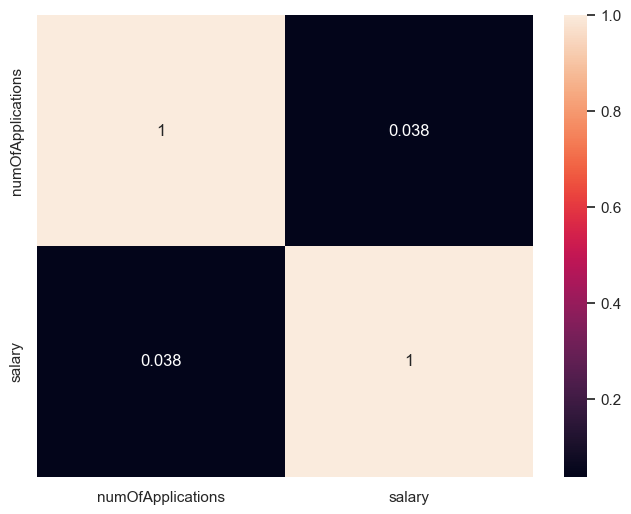

In [92]:
sns.set_theme()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)

=> Drop column numofApplications because the correlation between salary and it is very small

##### *Feature Selection for Categorical*

In [93]:
categorical_df = encoded_df.drop(['numOfApplications','salary'],axis = 1)
target = encoded_df['salary']
chi_scores = chi2(categorical_df, target)
chi_scores

(array([5.67687729e-26, 1.49900528e+02, 5.67687729e-26, 1.09567523e+01,
        2.27352389e+02, 3.28687036e+01, 1.37034499e+02, 1.13839239e+02,
        8.02127731e+01, 1.05964577e+02, 9.51316526e+01, 9.53003976e+01,
        1.05266186e+02, 1.05640624e+02, 1.53401802e+02, 1.17701643e+02,
        5.67687729e-26, 1.87761291e+02, 1.44918309e+02, 1.31227811e+02,
        1.69653776e+02, 1.13857958e+02, 1.46289588e+02, 2.07099774e+02,
        1.62050798e+02, 1.10219885e+02, 4.77176388e+02, 1.52871371e+02,
        1.35510970e+02, 3.05334499e+02, 3.39268107e+02, 1.46164210e+02,
        1.80358341e+02, 1.27313945e+02, 1.38193384e+02, 1.50432748e+02,
        1.39628392e+02, 1.02064060e+02, 1.11612345e+01, 4.77176388e+02,
        4.82787329e+01, 8.80175962e+01, 3.04741557e+00, 3.68710095e+02,
        5.86832564e+01, 1.16823852e+02, 6.35699706e+00, 1.69486049e+02,
        2.02277545e+02, 6.53975014e+01, 8.86775667e+01, 1.90701125e+01,
        2.37213485e+01, 1.06939256e+02, 1.82633335e+01, 4.265326

<AxesSubplot: >

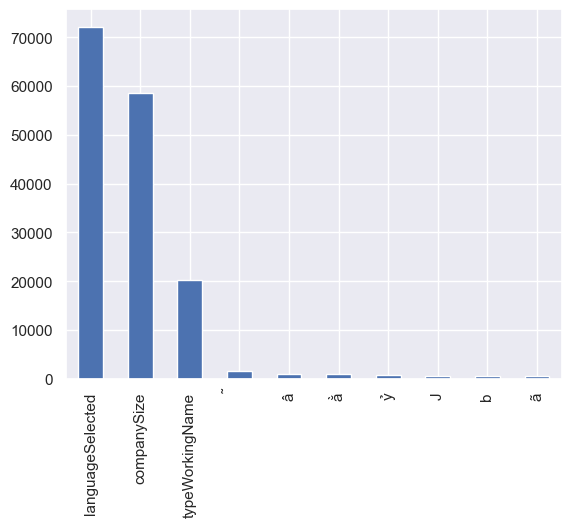

In [94]:
chi_values = pd.Series(chi_scores[0], index=categorical_df.columns)
chi_values = chi_values.sort_values(ascending=False)
chi_values[:10].plot.bar()

<AxesSubplot: >

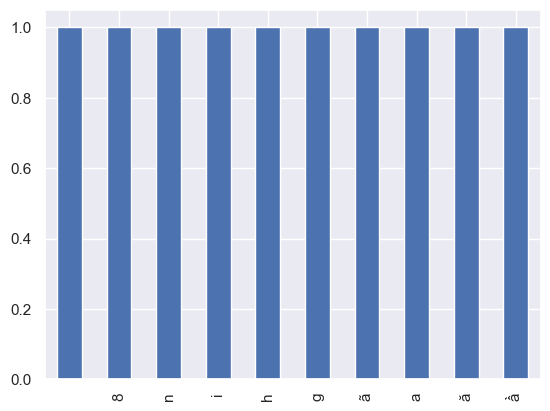

In [95]:
p_values = pd.Series(chi_scores[1], index=categorical_df.columns)
p_values = p_values.sort_values(ascending=False)
p_values[:10].plot.bar()

In [96]:
lower_importance_columns = p_values[p_values.values > 0.05].index.values
lower_importance_columns

array([' ', '8', 'n', 'i', 'h', 'g', 'ã', 'a', 'ă', 'ầ', 'ỉ', 'ề', 'ệ',
       ':', '9', '7', 'q', '6', '5', '4', '3', '2', '1', '0', 'ớ', ',',
       ' ', ')', '(', "'", 'o', 't', ' ', 'Ă', 'ớ', 'ẳ', 'ẫ', 'ỳ', ' ',
       'Ấ', "'", '2', '̉', '́', ':', 'A', 'đ', 'H', 'u', 'ú', 'ù', 'e',
       'i', 'k', 'Ý', 'p', 'Â', 'r', '}', '{', '{', '}', "'", 'Ố', '}',
       'e', ':', 'u', 't', 's', 'r', ':', 'o', '{', 'n', 'e', 'a', '{',
       'c', 'a', 'i', 'B', "'", '/', 'n', 'o', ',', ',', 'r', 's', '1',
       '}', 't', 'o', 'r', 'm', 'c', 'P', 'g', 'ỡ', 'h', 'S', 'C', 'i',
       'ĩ', 'ừ', 'l', 'l', 'T', 'ủ', 'm', 'u', 'c', 'N', 'ắ', 'ó', 'ạ',
       'D', '2', 'ừ', 'ả', 'e', '2', '8', 'n', 'B', '\\', 'D', 'd', 'm',
       'H', 'à', 'ì', '4', 'ọ', 's', 'p', 'T', '4', '5', '7', 'ư', 'ộ',
       '6', 'ò', 'v', 'h', 'á', 'W', 'ơ', 'O', 'ộ', 'B', '6', 'c', '7',
       'v', '3', 'ở', 'M', 'p', 'P', 'E', 'G', 'g', 'I', 'l', 'd', 'y',
       '&', 'Z', 'A', 'L', '1', 'E', 'ờ', 'p', 'x', 'O', 'N', '

In [97]:
final_df = encoded_df.drop(columns=lower_importance_columns, axis=1)
final_df

,numOfApplications,salary,J,f,#,+,J,f,z,É,...,ỏ,ổ,ỗ,ụ,ỷ,ũ,ẵ,typeWorkingName,companySize,languageSelected
0,32,700,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3260,317,2323
1,32,700,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,3260,317,2323
2,32,500,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,3260,317,238
3,32,650,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3260,317,2323
4,196,1200,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,3260,239,658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3298,32,1300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3260,1426,658
3299,32,4500,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,3260,746,2323
3300,41,650,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3260,317,2323
3301,20,2000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3260,1426,2323


<hr/>
<h4> <b>Model & Evaluate data </b> </h4>

In [98]:
y = final_df['salary']
X = final_df.drop(['salary'],axis = 1)

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

##### **=> We will use some algorithm of machine learning such as logistic regression, SVM, RandomForest, MLP to train model and implement to predict results with test_data**

##### Logistic Regresstion

In [101]:
lr_model = LogisticRegression(solver = 'liblinear', random_state= 100, penalty = 'l2')
lr_model.fit(X_train,y_train)

LogisticRegression(random_state=100, solver='liblinear')

In [102]:
y_pred=lr_model.predict(X_test)
val_accuracy=accuracy_score(y_test,y_pred)
print('Accuracy : ',round(val_accuracy *100,2),'%')

Accuracy :  18.31 %


SVM

In [103]:
svc_model=SVC()
svc_model.fit(X_train,y_train)

SVC()

In [104]:
y_pred=svc_model.predict(X_test)
val_accuracy=accuracy_score(y_test,y_pred)
print('Accuracy : ',round(val_accuracy *100,2),'%')

Accuracy :  18.61 %


RandomForest

In [105]:
from sklearn.ensemble import RandomForestClassifier
rd_model = RandomForestClassifier(n_estimators=140)
rd_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=140)

In [106]:
y_pred = rd_model.predict(X_test)

In [107]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 2155057.361573374
Mean Absolute Error (MAE): 790.2813918305598
R-squared (R^2): -0.686236268957872


MLP Regression

In [108]:
mlpregressor = MLPRegressor(hidden_layer_sizes=(256, 512, 512, 256, ),random_state=0, max_iter=500, early_stopping=True, verbose=1)
mlpregressor.fit(X_train, y_train)

Iteration 1, loss = 2424637.38504773
Validation score: -0.002712
Iteration 2, loss = 2296857.35727468
Validation score: -0.002190
Iteration 3, loss = 2293931.87571250
Validation score: -0.010734
Iteration 4, loss = 2285090.74807377
Validation score: -0.005596
Iteration 5, loss = 2290698.69703037
Validation score: -0.005975
Iteration 6, loss = 2289357.02037457
Validation score: -0.008082
Iteration 7, loss = 2296000.83444426
Validation score: -0.014000
Iteration 8, loss = 2304720.63661853
Validation score: -0.007882
Iteration 9, loss = 2289305.32349887
Validation score: -0.036619
Iteration 10, loss = 2278923.14925891
Validation score: -0.022554
Iteration 11, loss = 2280264.11341213
Validation score: -0.005965
Iteration 12, loss = 2278825.03059073
Validation score: -0.016689
Iteration 13, loss = 2277376.82139586
Validation score: -0.009405
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(early_stopping=True, hidden_layer_sizes=(256, 512, 512, 256),
             max_iter=500, random_state=0, verbose=1)

In [109]:
y_pred = mlpregressor.predict(X_test)

In [110]:
comparison_df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
comparison_df

,Actual,Predicted
587,1100,1469.112015
33,1200,1239.438879
2439,800,1260.311324
2955,1000,1260.850754
3293,5000,1468.186312
...,...,...
2307,5000,1389.920702
2279,1000,1389.920702
3207,2000,1389.808823
1114,1305,1283.039602


In [111]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 1260033.0912321156
Mean Absolute Error (MAE): 646.7589325967294
R-squared (R^2): 0.014080304121707132
